In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

BOXPLOTS
- first things first is finding the median of the data, where there will be 50% on one side and 50% on the other
- boxplot really just includes the 25 percentile, median and the 75 percentile
- whiskers: start of by measuring the distance between the 25th percentile to the 75th percentile
- then you need to stretch out the whisker by 1.5 IQR
- but usually you'd just stretch out the whiskers until the last values of the data on both sides, and you use a diamond symbol to put it as an outlier in your data

helps you understand:
- distribution of the data
- identify the outliers
- but the beauty the data is when you look at the distributions across other categories

In [2]:
#example

car = sns.load_dataset('mpg').dropna()

car.shape


(392, 9)

In [3]:
car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [6]:
#set the style
sns.set_style('whitegrid')

In [7]:
#just wanna do a little data cleaning
car.cylinders.value_counts()

#there's some odd values so we wanna just filter it to just 4,6,8

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

In [8]:
car = car[car.cylinders.isin([4,6,8])]

<Axes: ylabel='mpg'>

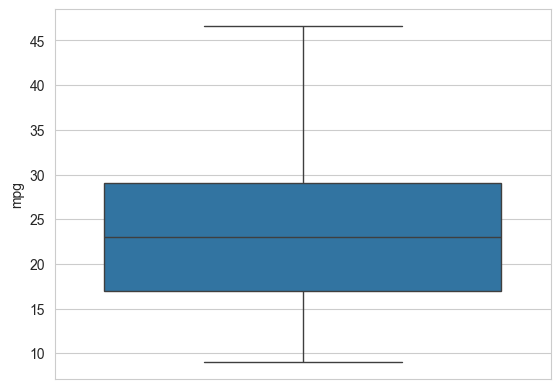

In [10]:
#now to create a boxplot
sns.boxplot(car.mpg)

In [12]:
car.mpg.describe() #to see if it aligns to the boxplot

count    385.000000
mean      23.445455
std        7.836911
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

<Axes: xlabel='origin', ylabel='mpg'>

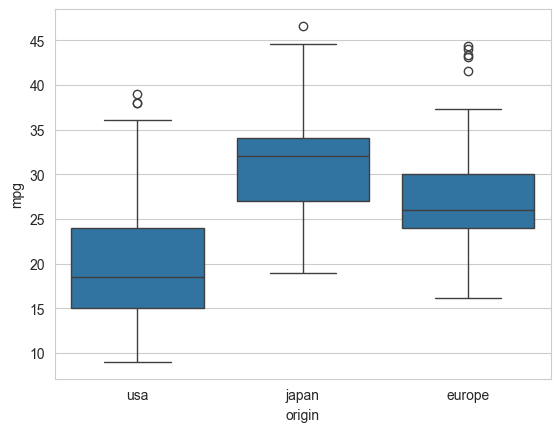

In [13]:
#now to separate according to categories

sns.boxplot(
    x = car.origin,
    y = car.mpg
)

<Axes: xlabel='origin', ylabel='mpg'>

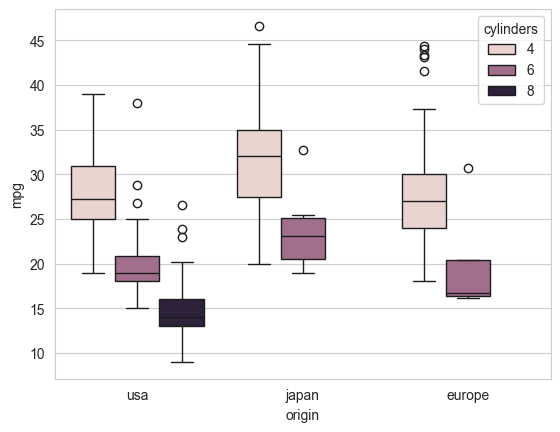

In [14]:
#using hue!
sns.boxplot(
    data = car,
    x = 'origin',
    y = 'mpg',
    hue = 'cylinders'
)

In [16]:
#you can also create your own categories if you'd want/column

car.model_year.describe()

count    385.000000
mean      75.961039
std        3.692058
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64

<Axes: xlabel='mpg', ylabel='origin'>

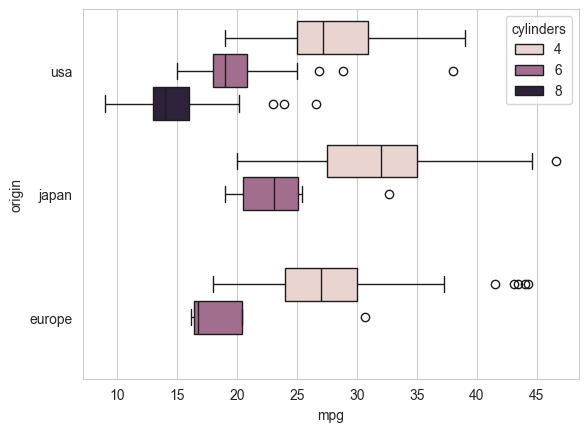

In [28]:
#styling options!

#changing from vertical to horizontal

sns.boxplot(
    data = car,
    x = 'mpg',
    y = 'origin',
    hue = 'cylinders'
)

<Axes: xlabel='origin', ylabel='mpg'>

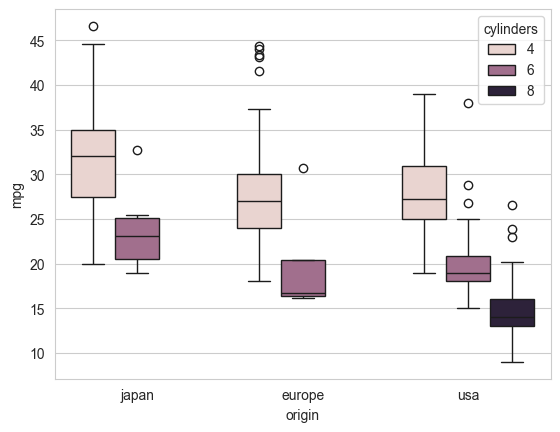

In [29]:
#changing the orders of the bar

sns.boxplot(
    data = car,
    x = 'origin',
    y = 'mpg',
    hue = 'cylinders',
    order = ['japan','europe','usa']
)

<Axes: xlabel='origin', ylabel='mpg'>

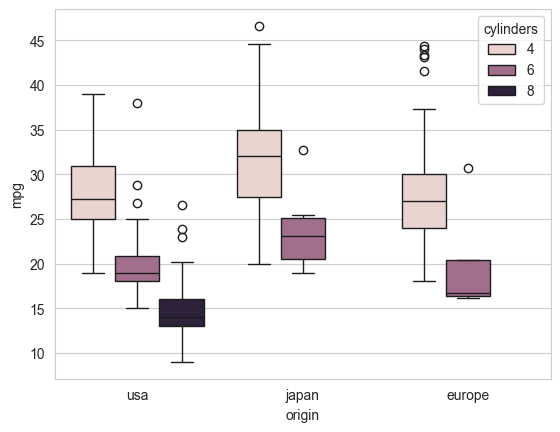

In [34]:
#change the order of the hue
sns.boxplot(
    data = car,
    x = 'origin',
    y = 'mpg',
    hue = 'cylinders',
    hue_order = ['8','6','4']
)

<Axes: xlabel='origin', ylabel='mpg'>

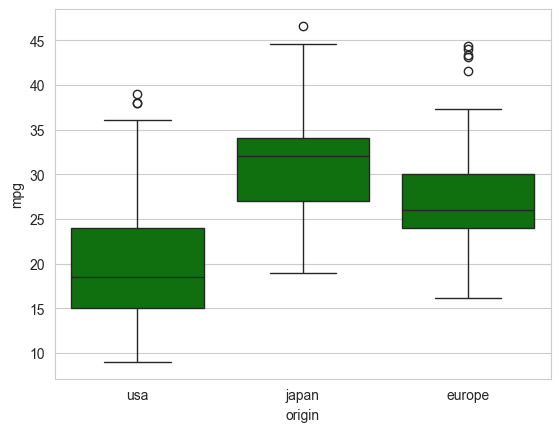

In [35]:
#change colour!

sns.boxplot(
    x = car.origin,
    y = car.mpg,
    color = 'g' #solid green colour
)

<Axes: xlabel='origin', ylabel='mpg'>

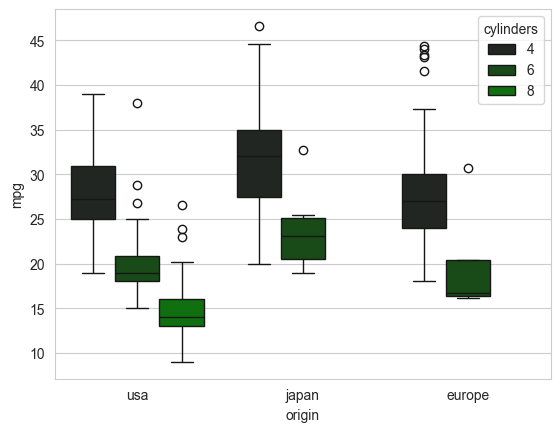

In [39]:
sns.boxplot(
    data = car,
    x = 'origin',
    y = 'mpg',
    hue = 'cylinders',
    palette = 'dark:g',
    hue_order = ['8','6','4']
)

<Axes: xlabel='origin', ylabel='mpg'>

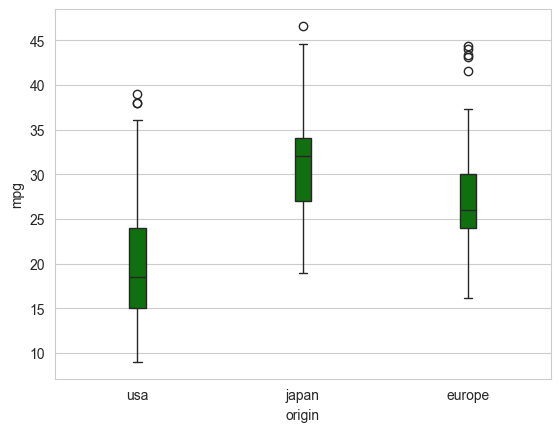

In [42]:
#chage the width of the bars
sns.boxplot(
    x = car.origin,
    y = car.mpg,
    color = 'g', #solid green colour,
    width = 0.1
)

<Axes: xlabel='origin', ylabel='mpg'>

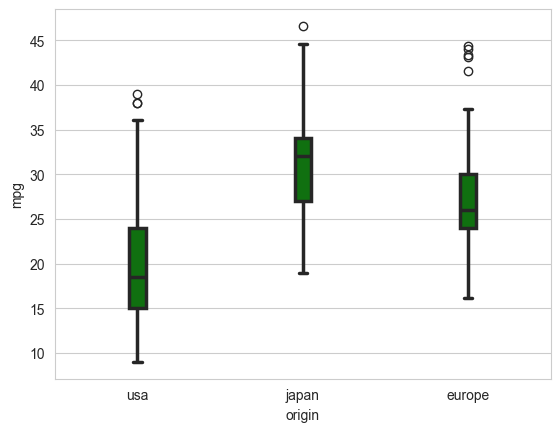

In [43]:

sns.boxplot(
    x = car.origin,
    y = car.mpg,
    color = 'g', #solid green colour,
    width = 0.1,
    linewidth = 2.5 #darker outline!
)

<Axes: xlabel='origin', ylabel='mpg'>

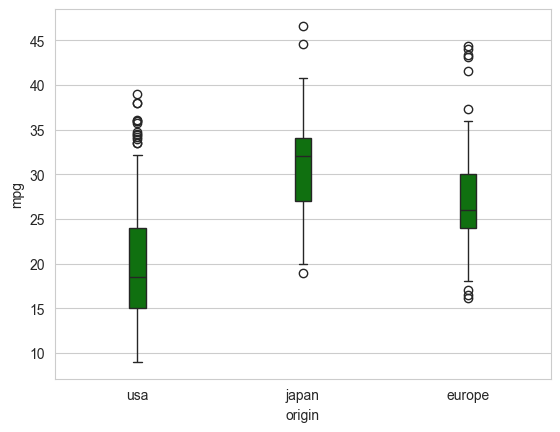

In [47]:
#whiskers length, whis

sns.boxplot(
    x = car.origin,
    y = car.mpg,
    color = 'g', #solid green colour,
    width = 0.1,
    whis = 1 #by default it is 1.5, so we can change it to 1, 2, etc, but it will change the outliers

)

<Axes: xlabel='origin', ylabel='mpg'>

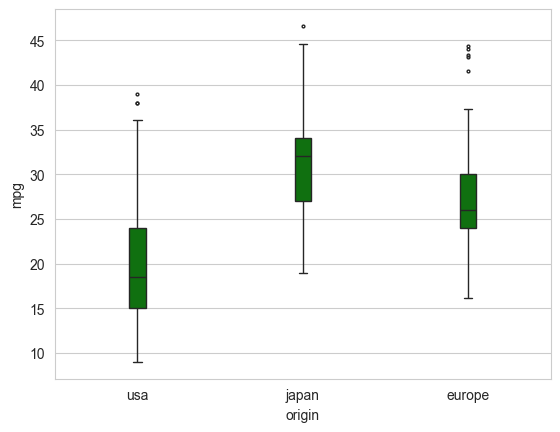

In [48]:
#fliersize, the outliers
sns.boxplot(
    x = car.origin,
    y = car.mpg,
    color = 'g', #solid green colour,
    width = 0.1,
    fliersize = 2 #the default is 5, so we can increase/decrease
)

There are other stylings that are available for boxplot that can be found in the matplotlib documentation.
It is just built upon matplotlib so sometimes seaborn does not list it

In [2]:
#now load our data

id = pd.read_excel('p30_fully_identified.xlsx', index_col = 0, sheet_name='newscores').reset_index()

unid = pd.read_excel('p30_fully_unidentified.xlsx', index_col=0)

mis = pd.read_excel('p30_mismatchclusters.xlsx', index_col=0,sheet_name='newscores').reset_index()

par = pd.read_excel('p30_partialclusters.xlsx', index_col=0,sheet_name='newscores').reset_index()

all = pd.read_excel('p30merge_PSM_PEAKS.xlsx', index_col=0)

av_all = pd.read_excel('p30merge_PSM_PEAKS.xlsx', index_col=0, sheet_name='average').reset_index()

In [3]:
id

,Cluster_ID,Peptide,Type,PEP(new),PEPscore,FDR(new),FDR,Delta(new),Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
0,1558,SEAPPTNQA,REF,28.742065,0.001336,0.092980,0.000930,30.774904,0.307749,NaN,NaN,NaN,4,134653,AB15,21
1,1558,SEAPPTNQA,REF,19.490058,0.011246,0.027793,0.000278,15.978610,0.159786,NaN,NaN,NaN,4,35109,AB16,21
2,1558,SEAPPTNQA,REF,21.273194,0.007459,0.092980,0.000930,39.880200,0.398802,NaN,NaN,NaN,4,69378,AB15,21
3,1558,SEAPPTNQA,REF,24.561057,0.003499,0.026518,0.000265,19.531540,0.195315,SEAPPTNQA,92.7,95.4,4,90980,AB16,21
4,1558,SEAPPTNQA,REF,24.977955,0.003178,0.026518,0.000265,29.122163,0.291222,SEAPPTNQA,93.9,96.1,4,90594,AB16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,16355,TTDFLFNLY,REF,26.437963,0.002271,0.051733,0.000517,92.052307,0.920523,TTDFLFNLY,96.3,97.6,4,195213,ZK01,5
1501,16355,TTDFLFNLY,REF,33.629668,0.000434,0.055310,0.000553,96.133346,0.961333,NaN,NaN,NaN,4,198967,MM01,5
1502,16355,TTDFLFNLY,REF,42.469435,0.000057,0.013912,0.000139,96.846437,0.968464,NaN,NaN,NaN,4,443031,AB19,5
1503,16355,TTDFLFNLY,REF,40.620190,0.000087,0.013912,0.000139,91.563631,0.915636,NaN,NaN,NaN,4,393927,AB19,5


BOXPLOT FOR PEPSCORE ACROSS P30 CLUSTERS

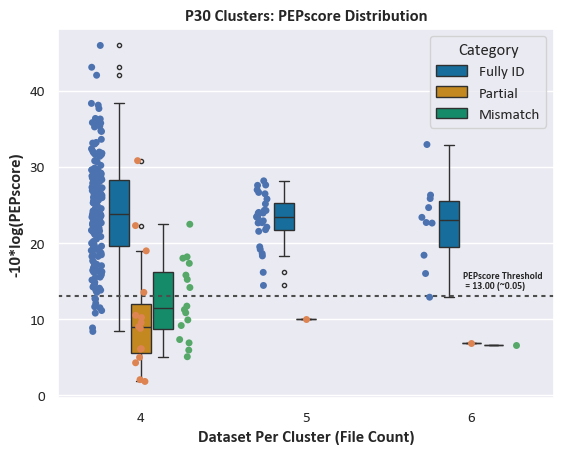

In [97]:
#plot boxplot according to filecount
sns.set_theme()
sns.set(font='Calibri')

six_pep = sns.boxplot(
    data = av_all,
    x = 'FileCount',
    y = 'PEPscore(new)',
    hue = 'Category',
    palette = 'colorblind',
    fliersize = 3,
    width = 0.4,
    gap = 0.1

)

six_pep.set_title('P30 Clusters: PEPscore Distribution', weight='bold')
six_pep.set_xlabel('Dataset Per Cluster (File Count)', weight='bold')
six_pep.set_ylabel('-10*log(PEPscore)', weight='bold')


sns.stripplot(
    data = av_all,
    x = 'FileCount',
    y = 'PEPscore(new)',
    hue = 'Category',
    dodge = True,
    jitter = True,
    legend = False
)

six_pep.axhline(13, color=".3", dashes=(2, 2))
six_pep.text(
    1.95,14,
    'PEPscore Threshold \n = 13.00 (~0.05)', 
    fontsize=7, weight = 'bold')

six_pep.figure.savefig('PEPvsFileCount.png',dpi=600)


Trying to use Catplot to plot

<Axes: xlabel='File Count in Each Cluster', ylabel='FDR'>

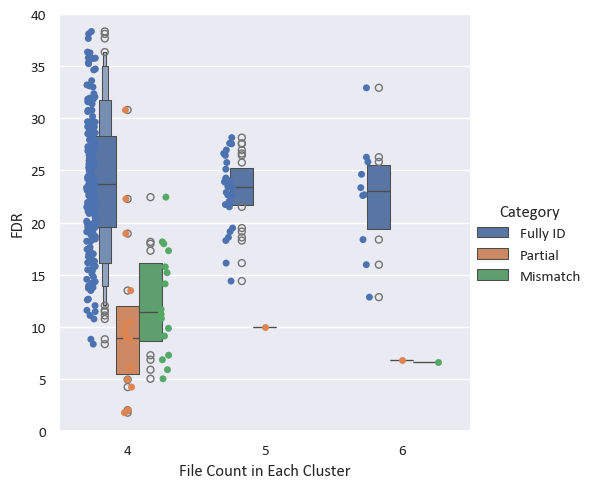

In [6]:
test = sns.catplot(
    data = av_all,
    x = 'FileCount',
    y = 'PEPscore(new)',
    hue = 'Category',
    kind = 'boxen',
    width = 0.5
)

test.set(ylim=(0,40))
test.set_ylabels('FDR')
test.set_xlabels('File Count in Each Cluster')

sns.stripplot(
    data = av_all,
    x = 'FileCount',
    y = 'PEPscore(new)',
    hue = 'Category',
    dodge = True,
    jitter = True,
    legend = False
)


Try to plot a line graph to compare FDR and the PEP?
- Does not work with this data

In [35]:
av_all

,Cluster ID,Average of PEPscore,Average of Delta,Average of FDR,Category,FileCount,PEPscore(new),Delta(new),FDR(new)
0,1719,0.004624,0.447177,0.000478,Fully ID,6,23.350007,44.717695,0.047830
1,4222,0.005500,0.882743,0.000562,Fully ID,6,22.596454,88.274282,0.056205
2,4263,0.014542,0.239197,0.000670,Fully ID,6,18.373827,23.919717,0.067036
3,4293,0.003441,0.686507,0.000403,Fully ID,6,24.633108,68.650696,0.040348
4,4364,0.005407,0.830648,0.000407,Fully ID,6,22.670113,83.064822,0.040698
...,...,...,...,...,...,...,...,...,...
266,5009,0.257150,0.076258,0.042232,Mismatch,4,5.898143,7.625850,4.223170
267,5394,0.206338,0.030211,0.030127,Mismatch,4,6.854201,3.021133,3.012667
268,6218,0.026556,0.016696,28.287328,Mismatch,4,15.758308,1.669640,2828.732751
269,9465,0.122181,0.151042,0.014720,Mismatch,4,9.129948,15.104232,1.471994


<Axes: title={'center': 'P30 Threshold FDR Distribution'}, xlabel='File Count in Each Cluster', ylabel='FDR'>

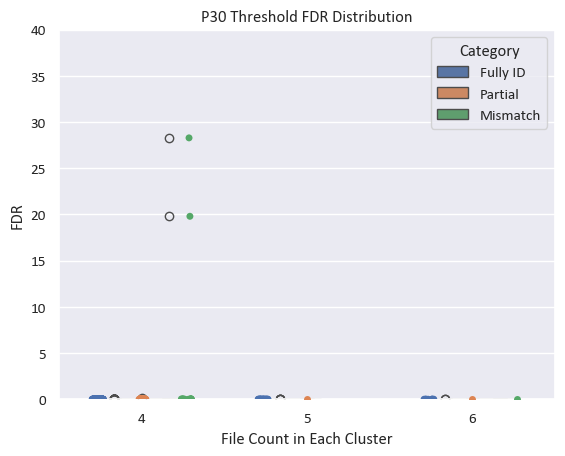

In [101]:
test = sns.boxplot(
    data = av_all,
    x = 'FileCount',
    y = 'FDR(new)',
    hue = 'Category',
    width = 0.5
)

test.set(ylim=(0,40))
test.set_title('P30 Threshold FDR Distribution')
test.set_ylabel('FDR')
test.set_xlabel('File Count in Each Cluster')

sns.stripplot(
    data = av_all,
    x = 'FileCount',
    y = 'FDR(new)',
    hue = 'Category',
    dodge = True,
    jitter = True,
    legend = False
)


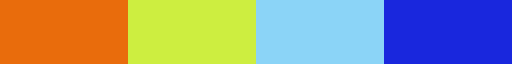

In [7]:
from pypalettes import load_cmap
cmap = load_cmap('Acanthurus_sohal', keep=[True,True,True,True,False])

cmap

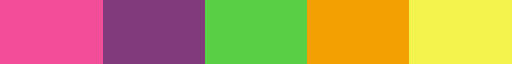

In [8]:
cmap1 = load_cmap('BillyApple')

cmap1

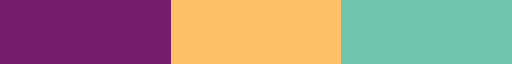

In [9]:
cmap2 = load_cmap('Alexandrite', keep=[False,False,False,False,True,True,False,True])

cmap2

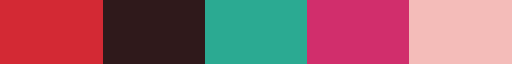

In [10]:
cmap3 = load_cmap('AndyWarhol_2')

cmap3

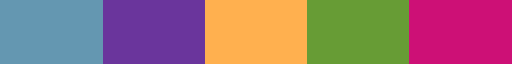

In [11]:
cmap4 = load_cmap('Bold')

cmap4

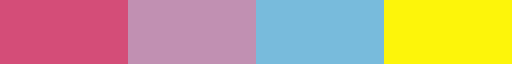

In [12]:
cmap5 = load_cmap('Bodianus_pulchellus', keep=[False,True,True,True,True])

cmap5

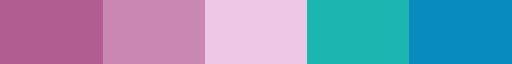

In [13]:
cmap6 = load_cmap('Berry', keep=[True,True,True,True,True,False])

cmap6

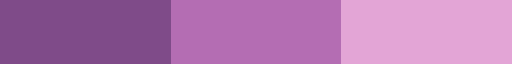

In [14]:
cmap7 = load_cmap('Arches2', keep=[False,True,True,True,False])

cmap7

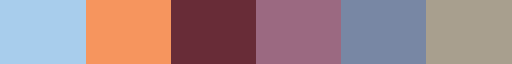

In [15]:
cmap8 = load_cmap('Arches')

cmap8

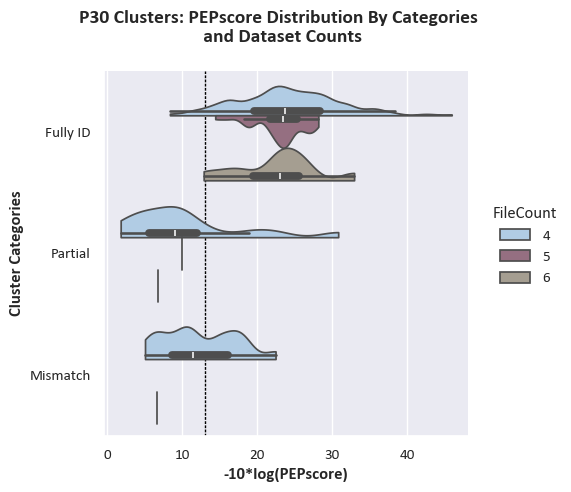

In [16]:
sns.set(font='Calibri')
test1 = sns.catplot(
    data = av_all,
    y = 'Category',
    x = 'PEPscore(new)',
    hue = 'FileCount',
    palette = cmap8,
    kind = 'violin',
    bw_adjust = .5,
    cut = 0,
    split=True
)

test1.set_axis_labels('-10*log(PEPscore)','Cluster Categories', weight='bold')
test1.fig.subplots_adjust(top=0.9)
test1.fig.suptitle('P30 Clusters: PEPscore Distribution By Categories \n and Dataset Counts', weight = 'bold',fontsize=14)

test1.map(plt.axvline, x=13, dashes=(2, 1), zorder=0,linewidth=1, color ='black')
#test1.figure.savefig('PEPscore_catplot.png', dpi=600)

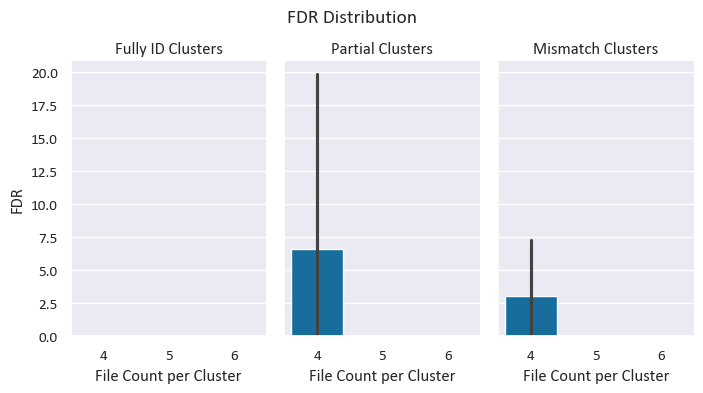

In [103]:
test2 = sns.catplot(
    data = av_all,
    x = 'FileCount',
    y = 'FDR(new)',
    hue = 'FileCount',
    legend = False,
    col = 'Category', #this will create subplots
    kind = 'bar',
    height = 4,
    aspect = .6,
    palette = 'colorblind'
)

test2.set_axis_labels('File Count per Cluster','FDR')
test2.set_titles(col_template="{col_name} Clusters")
test2.fig.subplots_adjust(top=0.85)
test2.fig.suptitle('FDR Distribution', fontsize=14)

test2.figure.savefig('FDRvsFileCount.png',dpi=600)

#change the FDR to percentage rather than log

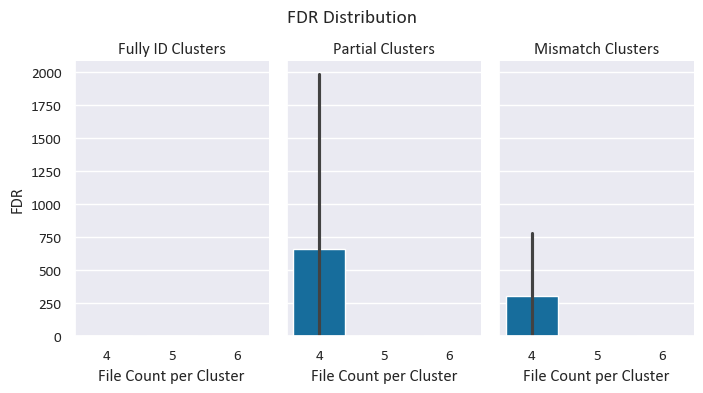

In [192]:
test2 = sns.catplot(
    data = av_all,
    x = 'FileCount',
    y = 'FDR(new)',
    hue = 'FileCount',
    legend = False,
    col = 'Category', #this will create subplots
    kind = 'bar',
    height = 4,
    aspect = .6,
    palette = 'colorblind'
)

test2.set_axis_labels('File Count per Cluster','FDR')
test2.set_titles(col_template="{col_name} Clusters")
test2.fig.subplots_adjust(top=0.85)
test2.fig.suptitle('FDR Distribution', fontsize=14)

test2.figure.savefig('FDRvsFileCount(barplot).png',dpi=600)

<Axes: xlabel='FileCount', ylabel='PEPscore(new)'>

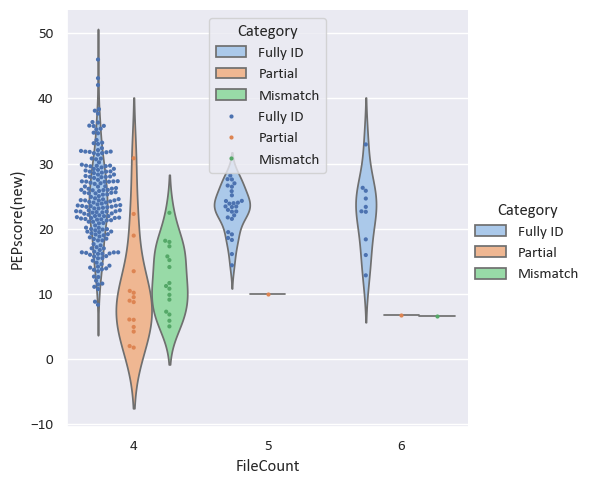

In [108]:
#we can also do single-subplot figues to layer different representations

test3 = sns.catplot(
    data = av_all,
    x = 'FileCount',
    y = 'PEPscore(new)',
    hue = 'Category',
    kind = 'violin',
    palette = 'pastel',
    inner = None,
)

sns.swarmplot(
    data = av_all,
    x = 'FileCount',
    y = 'PEPscore(new)',
    hue = 'Category',
    size = 3,
    dodge = True,
    legend = True
)

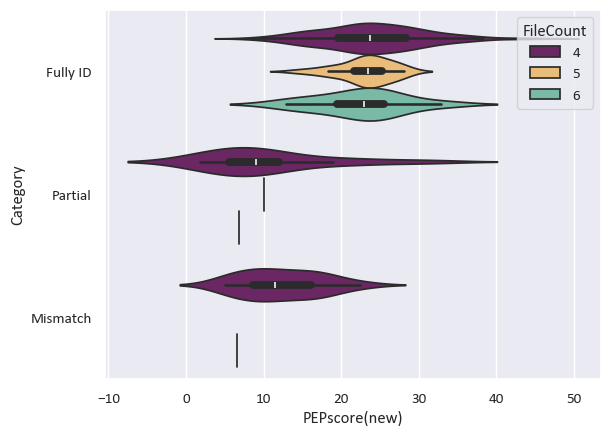

In [164]:
#trying  violin plot

test4 = sns.violinplot(
    data = av_all,
    x = 'PEPscore(new)',
    y = 'Category',
    hue = 'FileCount',
    palette = cmap2
)

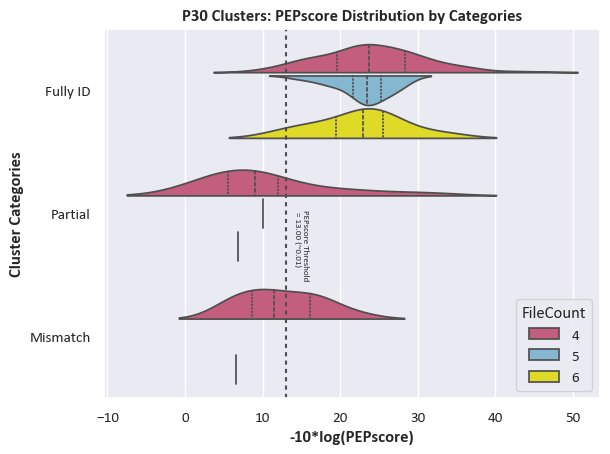

In [266]:
sns.set(font='Calibri')
test4 = sns.violinplot(
    data = av_all,
    x = 'PEPscore(new)',
    y = 'Category',
    hue = 'FileCount',
    palette = cmap5,
    split = True, #to save space and combine the violin into one
    inner = 'quart',
    gap = 0.1 #to add gap in between
)


test4.set_title('P30 Clusters: PEPscore Distribution by Categories', weight='bold')
test4.set_xlabel('-10*log(PEPscore)', weight='bold')
test4.set_ylabel('Cluster Categories', weight = 'bold')


test4.axvline(13, color=".3", dashes=(2, 2))
test4.text(
    14, 1.55,
    'PEPscore Threshold \n = 13.00 (~0.01)', 
    fontsize=6.5,
    rotation=270)

sns.move_legend(test4, 'lower right')

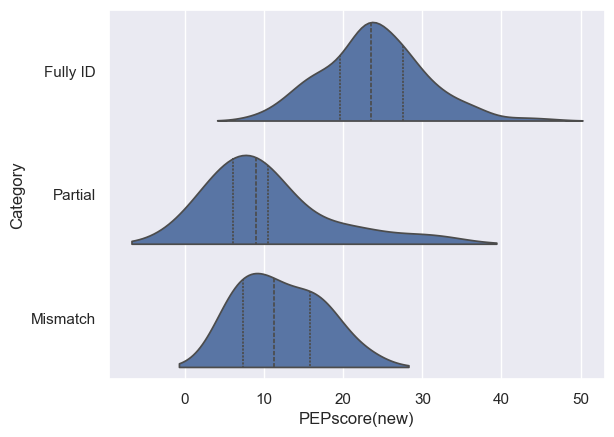

In [193]:
test4 = sns.violinplot(
    data = av_all,
    x = 'PEPscore(new)',
    y = 'Category',
    split = True,
    inner = 'quart'
) #this plot is for when you wanna split single violins

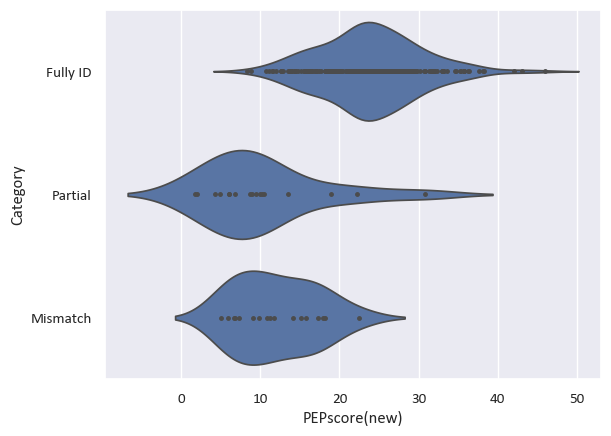

In [187]:
test4 = sns.violinplot(
    data = av_all,
    x = 'PEPscore(new)',
    y = 'Category',
    inner = 'point' #to set every observation inside the distribution
)

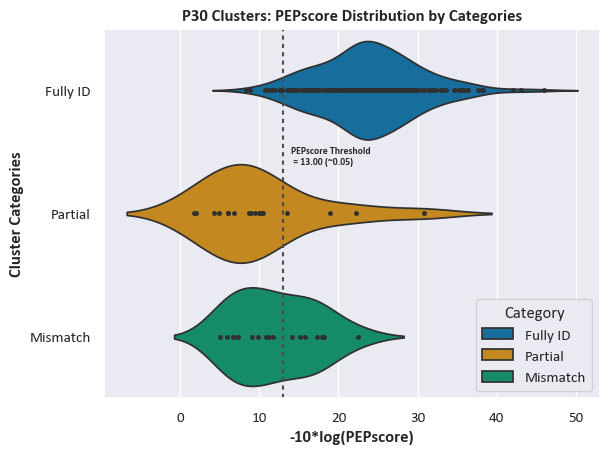

In [95]:
sns.set(font='Calibri')
test4 = sns.violinplot(
    data = av_all,
    x = 'PEPscore(new)',
    y = 'Category',
    hue = 'Category',
    legend = True,
    palette = 'colorblind',
    inner = 'point' #to set every observation inside the distribution
)

test4.set_title('P30 Clusters: PEPscore Distribution by Categories', weight='bold')
test4.set_xlabel('-10*log(PEPscore)', weight='bold')
test4.set_ylabel('Cluster Categories', weight = 'bold')

test4.axvline(13, color=".3", dashes=(2, 2))
test4.text(
    14, 0.6,
    'PEPscore Threshold \n = 13.00 (~0.05)', 
    fontsize=7, weight = 'bold')

test4.figure.savefig('PEPvsClusterCategoris.png',dpi=600)

Text(0, 0.5, 'Cluster Categories')

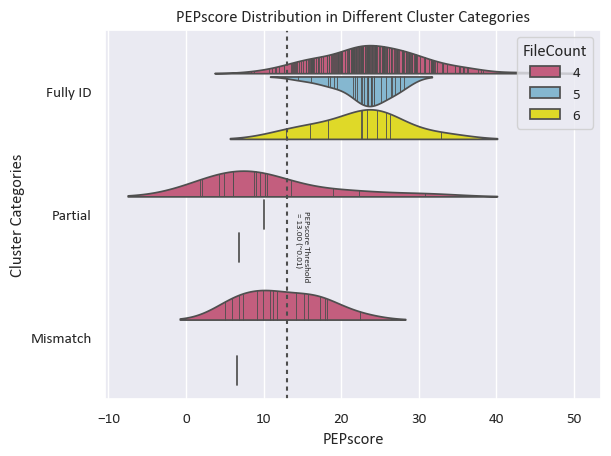

In [254]:
test4 = sns.violinplot(
    data = av_all,
    x = 'PEPscore(new)',
    y = 'Category',
    hue = 'FileCount',
    split = True, #to save space and combine the violin into one
    gap = 0.1, #to add gap in between
    legend = True,
    palette = cmap5,
    inner = 'stick' #to set every observation inside the distribution
)

test4.axvline(13, color=".3", dashes=(2, 2))
test4.text(
    14, 1.55,
    'PEPscore Threshold \n = 13.00 (~0.01)', 
    fontsize=6.5,
    rotation=270)

test4.set_title('PEPscore Distribution in Different Cluster Categories')
test4.set_xlabel('PEPscore')
test4.set_ylabel('Cluster Categories')

Now we focus on fully identified

In [26]:
iden = av_all[['Cluster ID','PEPscore(new)','Category','Delta(new)','FDR(new)','FileCount']]

iden = iden.loc[iden['Category']=='Fully ID']

iden

,Cluster ID,PEPscore(new),Category,Delta(new),FDR(new),FileCount
0,1719,23.350007,Fully ID,44.717695,0.047830,6
1,4222,22.596454,Fully ID,88.274282,0.056205,6
2,4263,18.373827,Fully ID,23.919717,0.067036,6
3,4293,24.633108,Fully ID,68.650696,0.040348,6
4,4364,22.670113,Fully ID,83.064822,0.040698,6
...,...,...,...,...,...,...
232,13764,22.829554,Fully ID,93.051152,0.042602,4
233,13943,28.753991,Fully ID,54.917590,0.032877,4
234,16280,23.462600,Fully ID,65.551131,0.028350,4
235,16336,27.906691,Fully ID,73.011683,0.039286,4


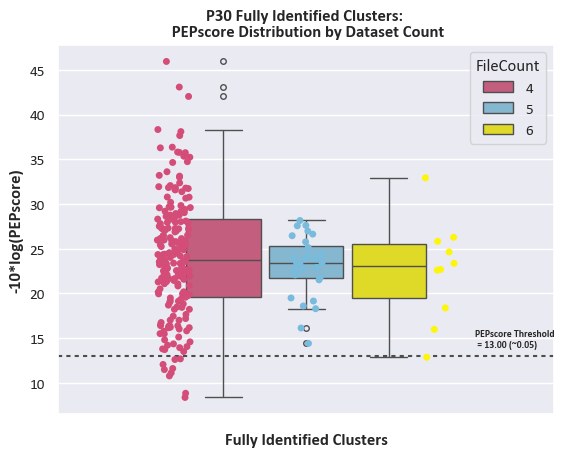

In [75]:
#plot
test5 = sns.boxplot(
    data = iden,
    y = 'PEPscore(new)',
    hue = 'FileCount',
    palette = cmap5,
    fliersize = 4,
    width = 0.5,
    gap = 0.1
)

sns.stripplot(
    data = iden,
    y = 'PEPscore(new)',
    hue = 'FileCount',
    palette = cmap5,
    dodge = True,
    jitter = True,
    legend = False
)

test5.axhline(13, color=".3", dashes=(2, 2))
test5.text(
    0.34,14,
    'PEPscore Threshold \n = 13.00 (~0.05)', 
    fontsize=7, weight = 'bold')

test5.set_title('P30 Fully Identified Clusters: \n PEPscore Distribution by Dataset Count', weight ='bold')
test5.set_ylabel('-10*log(PEPscore)', weight = 'bold')
test5.set_xlabel('Fully Identified Clusters', weight = 'bold')

test5.figure.savefig('fullid_boxplot.png',dpi =600)

In [29]:
id6 = id.loc[id['FileCount']==6]
id5 = id.loc[id['FileCount']==5]
id4 = id.loc[id['FileCount']==4]

In [30]:
id6

,Cluster_ID,Peptide,Type,PEP(new),PEPscore,FDR(new),FDR,Delta(new),Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
21,1719,EEEEPVKEA,REF,19.376700,0.011543,0.051733,0.000517,75.895670,0.758957,NaN,NaN,NaN,6,10868,ZK01,8
22,1719,EEEEPVKEA,REF,27.618560,0.001730,0.062539,0.000625,71.453961,0.714540,NaN,NaN,NaN,6,9609,MM01,8
23,1719,EEEEPVKEA,REF,22.465380,0.005668,0.029516,0.000295,21.690458,0.216905,EEEEPVKEA,98.7,99.5,6,100873,AB18,8
24,1719,EEEEPVKEA,REF,35.235756,0.000300,0.013912,0.000139,19.167348,0.191673,NaN,NaN,NaN,6,175596,AB19,8
25,1719,EEEEPVKEA,REF,36.026876,0.000250,0.013912,0.000139,18.136536,0.181365,NaN,NaN,NaN,6,143789,AB19,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,5272,VSDPVGVLY,REF,31.687575,0.000678,0.029516,0.000295,44.706498,0.447065,NaN,NaN,NaN,6,119964,AB18,11
971,5272,VSDPVGVLY,REF,29.966601,0.001008,0.029516,0.000295,59.368228,0.593682,NaN,NaN,NaN,6,196030,AB18,11
972,5272,VSDPVGVLY,REF,30.412336,0.000909,0.029516,0.000295,43.873458,0.438735,NaN,NaN,NaN,6,234273,AB18,11
973,5272,VSDPVGVLY,REF,40.222179,0.000095,0.055310,0.000553,35.604799,0.356048,NaN,NaN,NaN,6,103417,MM01,11


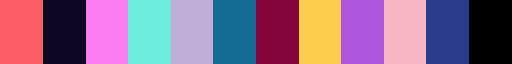

In [31]:
cmap9 = load_cmap('CrystalGems')
cmap9

c:\Users\Izadora\miniforge3\lib\site-packages\pypalettes\main.py:128: UserWarning: Using a continuous palette for a non-sequential palette can pose a problem in terms of the meaning of the graphs. Shut down this warning with `type_warning = False`. See https://blog.datawrapper.de/colors/ for more information.
  warnings.warn(


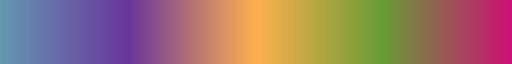

In [32]:
cmap4 = load_cmap('Bold', cmap_type='continuous')
cmap4

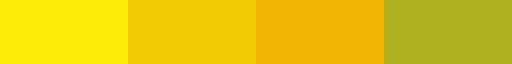

In [33]:
cmap10 = load_cmap('Elacatinus_figaro', keep =[False, True, True, True, True])

cmap10

In [34]:
#id6_new = id6.sort_values(by=['PEP(new)'], ascending=[True])

id6_new = id6.groupby(['Cluster_ID'])['PEP(new)'].mean().sort_values(ascending=True)

id5_new = id5.groupby(['Cluster_ID'])['PEP(new)'].mean().sort_values(ascending=True)

id4_new = id4.groupby(['Cluster_ID'])['PEP(new)'].mean().sort_values(ascending=True)


Text(0.5, 0, 'Fully Identified Cluster ID')

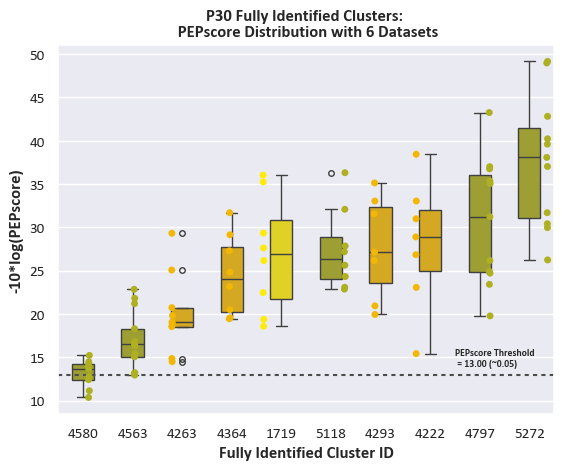

In [98]:
#plot

test6 = sns.boxplot(
    data = id6,
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'Cluster_ID',
    palette = cmap10,
    legend = False,
    fliersize = 4,
    width = 0.5,
    gap = 0.1,
    order = id6_new.index
)

sns.stripplot(
    data = id6,
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'Cluster_ID',
    palette = cmap10,
    dodge = True,
    jitter = True,
    legend = False,
    order = id6_new.index
)

test6.axhline(13, color=".3", dashes=(2, 2))
test6.text(
    7.5,14,
    'PEPscore Threshold \n = 13.00 (~0.05)', 
    fontsize=7, weight='bold')

test6.set_title('P30 Fully Identified Clusters: \n PEPscore Distribution with 6 Datasets', weight ='bold')
test6.set_ylabel('-10*log(PEPscore)', weight = 'bold')
test6.set_xlabel('Fully Identified Cluster ID', weight = 'bold')

#test6.figure.savefig('fullid_boxplot(6files).png',dpi =600)

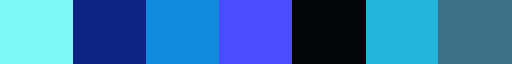

In [38]:
cmap11 = load_cmap('Aquamarine')
cmap11

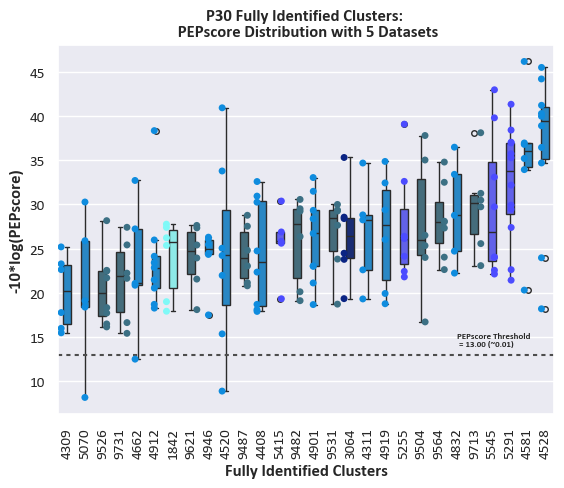

In [440]:
#plot

test7 = sns.boxplot(
    data = id5,
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'Cluster_ID',
    palette = cmap11,
    legend = False,
    fliersize = 4,
    width = 0.5,
    gap = 0.1,
    order = id5_new.index
)

sns.stripplot(
    data = id5,
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'Cluster_ID',
    palette = cmap11,
    dodge = True,
    jitter = True,
    legend = False,
    order = id5_new.index
)

test7.axhline(13, color=".3", dashes=(2, 2))
test7.text(
    22,14,
    'PEPscore Threshold \n = 13.00 (~0.01)', 
    fontsize=6.5, weight='bold')

test7.set_title('P30 Fully Identified Clusters: \n PEPscore Distribution with 5 Datasets', weight ='bold')
test7.set_ylabel('-10*log(PEPscore)', weight = 'bold')
test7.set_xlabel('Fully Identified Clusters', weight = 'bold')

plt.xticks(rotation =90)

test7.figure.savefig('fullid_boxplot(5files).png',dpi =600)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

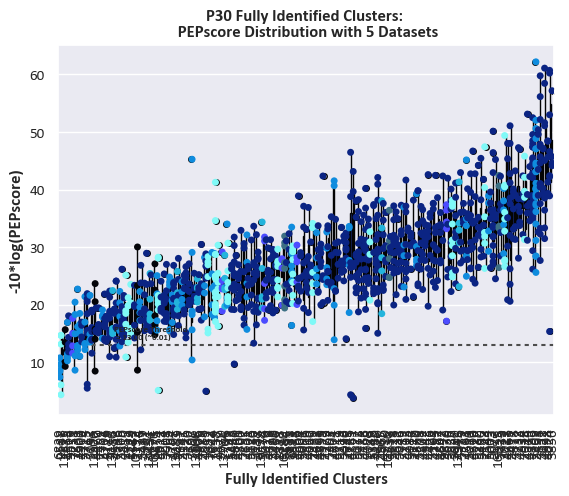

In [441]:
#plot

test8 = sns.boxplot(
    data = id4,
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'Cluster_ID',
    palette = cmap11,
    legend = False,
    fliersize = 4,
    width = 0.5,
    gap = 0.1,
    order = id4_new.index
)

sns.stripplot(
    data = id4,
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'Cluster_ID',
    palette = cmap11,
    dodge = True,
    jitter = True,
    legend = False,
    order = id4_new.index
)

test8.axhline(13, color=".3", dashes=(2, 2))
test8.text(
    22,14,
    'PEPscore Threshold \n = 13.00 (~0.01)', 
    fontsize=6.5, weight='bold')

test8.set_title('P30 Fully Identified Clusters: \n PEPscore Distribution with 5 Datasets', weight ='bold')
test8.set_ylabel('-10*log(PEPscore)', weight = 'bold')
test8.set_xlabel('Fully Identified Clusters', weight = 'bold')

plt.xticks(rotation =90)

#test8.figure.savefig('fullid_boxplot(5files).png',dpi =600)

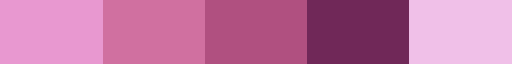

In [39]:
cmap12 = load_cmap('ditto', keep=[True,True,True,False,True,True])

cmap12

Partial Clusters

In [40]:
partial = av_all[['Cluster ID','PEPscore(new)','Category','Delta(new)','FDR(new)','FileCount']]

partial = partial.loc[partial['Category']=='Partial']

partial

,Cluster ID,PEPscore(new),Category,Delta(new),FDR(new),FileCount
237,4331,6.806795,Partial,6.055500,2.500780,6
238,3805,10.006006,Partial,57.893420,1.246540,5
239,2397,10.188713,Partial,9.234237,1.177449,4
240,3025,4.946641,Partial,18.517900,4.275490,4
241,4226,9.510223,Partial,20.627612,1.322182,4
242,4336,13.487855,Partial,35.921905,0.212958,4
243,4585,30.801508,Partial,74.425236,0.020715,4
244,5074,8.972817,Partial,0.050300,1.682350,4
245,5108,10.473674,Partial,3.399500,0.834379,4
246,5145,6.088196,Partial,35.204133,3.224587,4


In [41]:
par_new = par.groupby(['Cluster_ID'])['PEP(new)'].mean().sort_values(ascending=True)


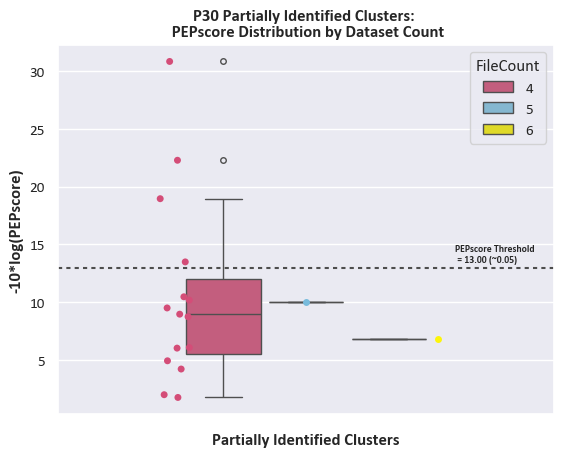

In [74]:
#plot

sns.set(font='Calibri')
test2 = sns.boxplot(
    data = partial,
    y = 'PEPscore(new)',
    hue = 'FileCount',
    palette=cmap5,
    fliersize = 4,
    width = 0.5,
    gap = 0.1,
)

sns.stripplot(
    data = partial,
    y = 'PEPscore(new)',
    hue = 'FileCount',
    palette=cmap5,
    dodge = True,
    jitter = True,
    legend = False,
)

test2.axhline(13, color=".3", dashes=(2, 2))

test2.set_title('P30 Partially Identified Clusters: \n PEPscore Distribution by Dataset Count', weight='bold')
test2.set_xlabel('Partially Identified Clusters', weight='bold')
test2.set_ylabel('-10*log(PEPscore)', weight ='bold')

test2.text(
    0.3,13.5,
    'PEPscore Threshold \n = 13.00 (~0.05)', 
    fontsize=7, weight='bold')


test2.figure.savefig('par_boxplot(allfiles).png',dpi =600)

In [44]:
par

,Cluster_ID,Peptide,Type,PEP(new),PEPscore,FDR(new),FDR,Delta(new),Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
0,2397,UNIDENTIFIED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,103295,AB15,9
1,2397,SEAPTPSH,NOV,10.038286,0.099122,18.631463,0.013704,11.271931,0.074612,NaN,NaN,NaN,4,103475,AB15,9
2,2397,SEAPTPSH,NOV,10.191303,0.095691,20.315185,0.009300,8.165357,0.152568,NaN,NaN,NaN,4,61588,AB16,9
3,2397,SEAPTPSH,NOV,13.284384,0.046942,21.715805,0.006736,9.596192,0.109744,NaN,NaN,NaN,4,134728,AB15,9
4,2397,SEAPTPSH,NOV,13.060357,0.049427,24.726524,0.003368,18.796400,0.013193,SEAPPTHS,94.5,98.7,4,95977,AB18,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,13052,UNIDENTIFIED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,621627,AB19,20
187,13052,UNIDENTIFIED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,552592,AB19,20
188,13052,UNIDENTIFIED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,328128,AB18,20
189,13052,UNIDENTIFIED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,327904,AB18,20


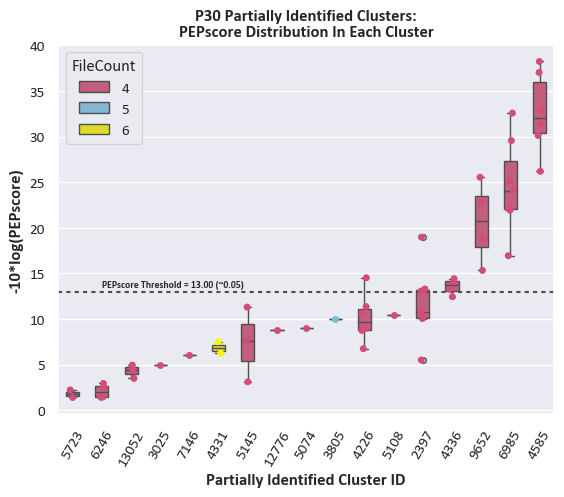

In [99]:
#plot

sns.set(font='Calibri')
test3 = sns.boxplot(
    data = par,
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'FileCount',
    palette=cmap5,
    fliersize = 4,
    width = 0.5,
    gap = 0.1,
    order = par_new.index
)

sns.stripplot(
    data = par,
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'FileCount',
    palette=cmap5,
    dodge = False,
    jitter = True,
    legend = False,
    order = par_new.index
)

test3.axhline(13, color=".3", dashes=(2, 2))

test3.set_title('P30 Partially Identified Clusters:\nPEPscore Distribution In Each Cluster', weight='bold')
test3.set_xlabel('Partially Identified Cluster ID', weight='bold')
test3.set_ylabel('-10*log(PEPscore)', weight ='bold')

test3.text(
    1,13.5,
    'PEPscore Threshold = 13.00 (~0.05)', 
    fontsize=7, weight='bold')

plt.xticks(rotation=60)


test3.figure.savefig('par_boxplot(allfiles_eachcluster).png',dpi =600)

In [47]:
par

,Cluster_ID,Peptide,Type,PEP(new),PEPscore,FDR(new),FDR,Delta(new),Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
0,2397,UNIDENTIFIED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,103295,AB15,9
1,2397,SEAPTPSH,NOV,10.038286,0.099122,18.631463,0.013704,11.271931,0.074612,NaN,NaN,NaN,4,103475,AB15,9
2,2397,SEAPTPSH,NOV,10.191303,0.095691,20.315185,0.009300,8.165357,0.152568,NaN,NaN,NaN,4,61588,AB16,9
3,2397,SEAPTPSH,NOV,13.284384,0.046942,21.715805,0.006736,9.596192,0.109744,NaN,NaN,NaN,4,134728,AB15,9
4,2397,SEAPTPSH,NOV,13.060357,0.049427,24.726524,0.003368,18.796400,0.013193,SEAPPTHS,94.5,98.7,4,95977,AB18,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,13052,UNIDENTIFIED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,621627,AB19,20
187,13052,UNIDENTIFIED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,552592,AB19,20
188,13052,UNIDENTIFIED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,328128,AB18,20
189,13052,UNIDENTIFIED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,327904,AB18,20


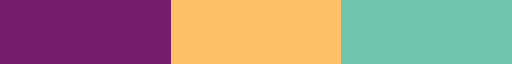

In [48]:
cmap2

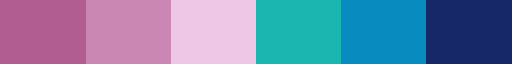

In [49]:
cmap13 = load_cmap('Berry')

cmap13

Text(0, 0.5, '-10*log(PEPscore)')

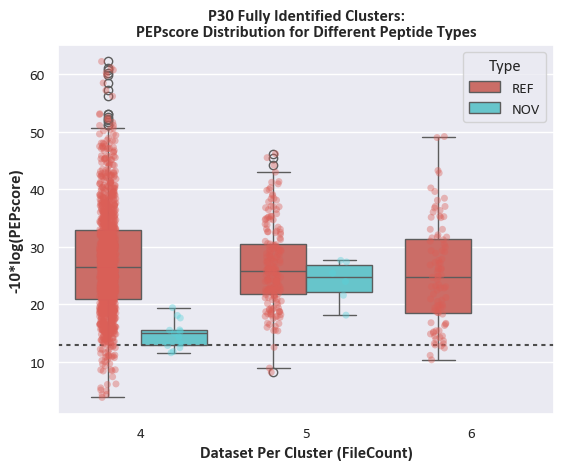

In [100]:
test1 = sns.boxplot(
    data = id,
    x = 'FileCount',
    y = 'PEP(new)',
    hue = 'Type',
    palette = 'hls'
)

sns.stripplot(
    data = id,
    x = 'FileCount',
    y = 'PEP(new)',
    hue = 'Type',
    palette='hls',
    dodge = True,
    jitter = True,
    legend = False,
    alpha = 0.4
)

test1.axhline(13, color=".3", dashes=(2, 2))

test1.set_title('P30 Fully Identified Clusters:\nPEPscore Distribution for Different Peptide Types', weight='bold')
test1.set_xlabel('Dataset Per Cluster (FileCount)', weight='bold')
test1.set_ylabel('-10*log(PEPscore)', weight ='bold')

#test1.figure.savefig('fullid_boxplot(by_types).png',dpi =600)


C:\Users\Izadora\AppData\Local\Temp\ipykernel_7384\799918791.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  test1 = sns.boxplot(
C:\Users\Izadora\AppData\Local\Temp\ipykernel_7384\799918791.py:16: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.stripplot(


Text(2, 14, 'PEPscore Threshold \n = 13.00 (~0.05)')

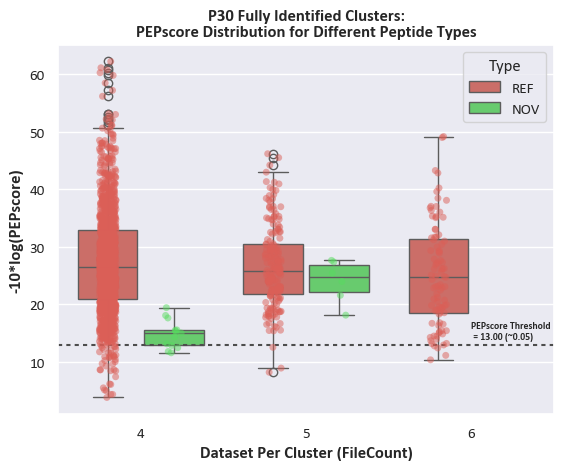

In [101]:
test1 = sns.boxplot(
    data = id,
    x = 'FileCount',
    y = 'PEP(new)',
    hue = 'Type',
    palette = my_color3,
    gap = 0.1
)

test1.axhline(13, color=".3", dashes=(2, 2))

test1.set_title('P30 Fully Identified Clusters:\nPEPscore Distribution for Different Peptide Types', weight='bold')
test1.set_xlabel('Dataset Per Cluster (FileCount)', weight='bold')
test1.set_ylabel('-10*log(PEPscore)', weight ='bold')

sns.stripplot(
    data = id,
    x = 'FileCount',
    y = 'PEP(new)',
    hue = 'Type',
    palette=my_color3,
    dodge = True,
    jitter = True,
    legend = False,
    alpha = 0.5
)


test1.text(
    2,14,
    'PEPscore Threshold \n = 13.00 (~0.05)', 
    fontsize=7, weight='bold')


#test1.figure.savefig('fullid_boxplot(by_types).png',dpi =600)


In [78]:
print(sns.color_palette('hls').as_hex())

['#db5f57', '#d3db57', '#57db5f', '#57d3db', '#5f57db', '#db57d3']


In [79]:
my_color = ['#db5f57', '#d3db57', '#57db5f']
my_color2 = ['#57d3db', '#5f57db', '#db57d3']
my_color3 = ['#db5f57', '#57db5f', '#5f57db']

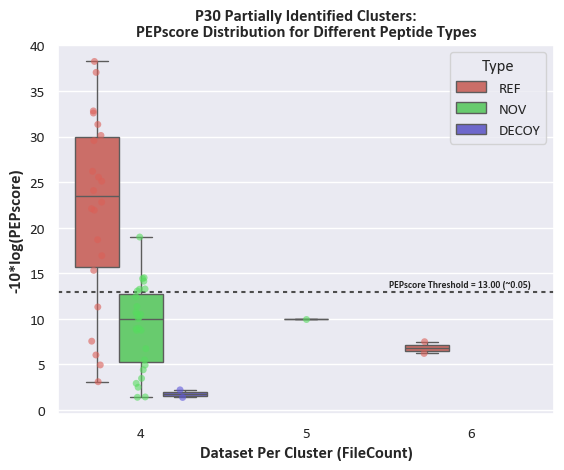

In [102]:
hue_order = ['REF','NOV','DECOY']

test1 = sns.boxplot(
    data = par,
    x = 'FileCount',
    y = 'PEP(new)',
    hue = 'Type',
    palette = my_color3,
    hue_order = hue_order
)

sns.stripplot(
    data = par,
    x = 'FileCount',
    y = 'PEP(new)',
    hue = 'Type',
    palette=my_color3,
    dodge = True,
    jitter = True,
    legend = False,
    alpha = 0.6,
    hue_order = hue_order
)

test1.axhline(13, color=".3", dashes=(2, 2))

test1.set_title('P30 Partially Identified Clusters:\nPEPscore Distribution for Different Peptide Types', weight='bold')
test1.set_xlabel('Dataset Per Cluster (FileCount)', weight='bold')
test1.set_ylabel('-10*log(PEPscore)', weight ='bold')

test1.text(
    1.5,13.5,
    'PEPscore Threshold = 13.00 (~0.05)', 
    fontsize=7, weight='bold')

test1.figure.savefig('par_boxplot(by_types).png',dpi =600)


Mismatch Clusteres

In [84]:
av_all

,Cluster ID,Average of PEPscore,Average of Delta,Average of FDR,Category,FileCount,PEPscore(new),Delta(new),FDR(new),Unnamed: 9,...,Unnamed: 35,Cluster ID.3,Average of PEPscore.3,Average of Delta.3,Average of FDR.3,Category.3,FileCount.3,PEPscore(new).3,Delta(new).3,FDR(new).3
0,1719,0.004624,0.447177,0.000478,Fully ID,6,23.350007,44.717695,0.047830,NaN,...,NaN,1558.0,0.007399,0.248481,0.000716,Fully ID,4.0,21.308230,24.848117,0.071573
1,4222,0.005500,0.882743,0.000562,Fully ID,6,22.596454,88.274282,0.056205,NaN,...,NaN,1789.0,0.002756,0.494224,0.000404,Fully ID,4.0,25.597919,49.422395,0.040370
2,4263,0.014542,0.239197,0.000670,Fully ID,6,18.373827,23.919717,0.067036,NaN,...,NaN,1792.0,0.019941,0.607864,0.000921,Fully ID,4.0,17.002455,60.786405,0.092126
3,4293,0.003441,0.686507,0.000403,Fully ID,6,24.633108,68.650696,0.040348,NaN,...,NaN,1797.0,0.005228,0.592461,0.000330,Fully ID,4.0,22.816577,59.246092,0.033021
4,4364,0.005407,0.830648,0.000407,Fully ID,6,22.670113,83.064822,0.040698,NaN,...,NaN,1838.0,0.003516,0.443461,0.000402,Fully ID,4.0,24.539237,44.346078,0.040176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,5009,0.257150,0.076258,0.042232,Mismatch,4,5.898143,7.625850,4.223170,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,5394,0.206338,0.030211,0.030127,Mismatch,4,6.854201,3.021133,3.012667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,6218,0.026556,0.016696,28.287328,Mismatch,4,15.758308,1.669640,2828.732751,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,9465,0.122181,0.151042,0.014720,Mismatch,4,9.129948,15.104232,1.471994,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
mismatch = av_all[['Cluster ID','PEPscore(new)','Category','Delta(new)','FDR(new)','FileCount']]

mismatch = mismatch.loc[mismatch['Category']=='Mismatch']

mismatch

,Cluster ID,PEPscore(new),Category,Delta(new),FDR(new),FileCount
254,4571,6.632927,Mismatch,12.488443,3.264471,6
255,1787,22.442592,Mismatch,54.606837,0.046046,4
256,2116,7.287459,Mismatch,5.329900,3.303250,4
257,4029,14.127990,Mismatch,2.317706,0.528069,4
258,4326,18.157749,Mismatch,8.497280,0.099605,4
259,4413,15.191678,Mismatch,2.355116,1980.118805,4
260,4650,9.867937,Mismatch,2.537242,1.156350,4
261,4742,17.304429,Mismatch,5.025656,0.109775,4
262,4768,10.807969,Mismatch,4.779710,0.857033,4
263,4799,5.028612,Mismatch,28.166050,5.018600,4


In [86]:
mis_new = mis.groupby(['Cluster_ID'])['PEP(new)'].mean().sort_values(ascending=True)

In [87]:
mis_new

Cluster_ID
4799     5.147675
5009     5.920959
4571     6.767286
5394     6.938524
2116     7.438590
4650    10.043063
9465    10.290409
4768    11.378362
4801    11.939935
9656    14.425826
4413    15.333489
6218    16.004436
4742    17.868892
4029    18.329268
4864    20.140450
4326    20.581212
1787    23.912966
Name: PEP(new), dtype: float64

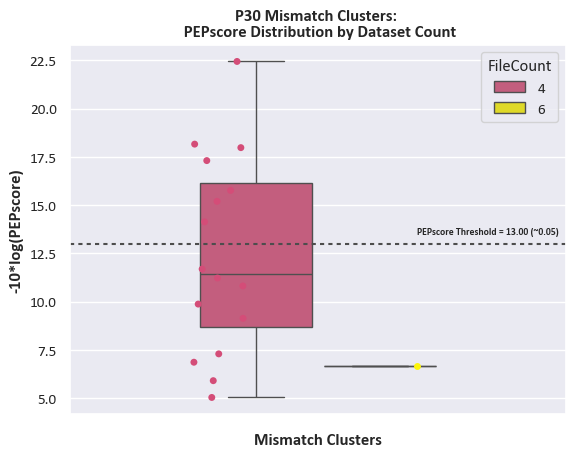

In [89]:
#plot

sns.set(font='Calibri')
test2 = sns.boxplot(
    data = mismatch,
    y = 'PEPscore(new)',
    hue = 'FileCount',
    palette=cmap5,
    fliersize = 4,
    width = 0.5,
    gap = 0.1,
)

sns.stripplot(
    data = mismatch,
    y = 'PEPscore(new)',
    hue = 'FileCount',
    palette=cmap5,
    dodge = True,
    jitter = True,
    legend = False,
)

test2.axhline(13, color=".3", dashes=(2, 2))

test2.set_title('P30 Mismatch Clusters: \n PEPscore Distribution by Dataset Count', weight='bold')
test2.set_xlabel('Mismatch Clusters', weight='bold')
test2.set_ylabel('-10*log(PEPscore)', weight ='bold')

test2.text(
    0.2,13.5,
    'PEPscore Threshold = 13.00 (~0.05)', 
    fontsize=7, weight='bold')


test2.figure.savefig('mis_boxplot(allfiles).png',dpi =600)

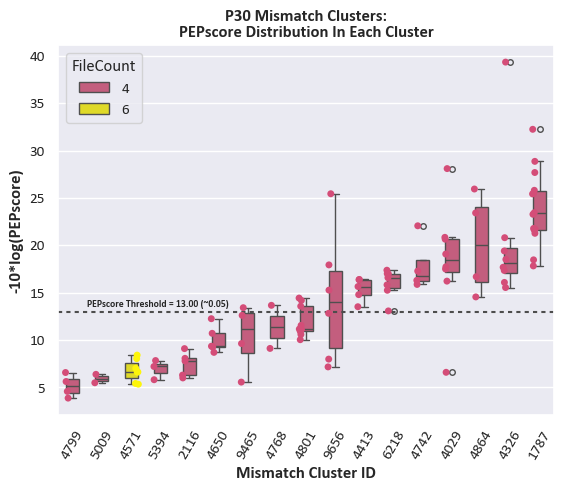

In [103]:
#plot

sns.set(font='Calibri')
test3 = sns.boxplot(
    data = mis,
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'FileCount',
    palette=cmap5,
    fliersize = 4,
    width = 0.5,
    gap = 0.1,
    order = mis_new.index
)

sns.stripplot(
    data = mis,
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'FileCount',
    palette=cmap5,
    dodge = True,
    jitter = True,
    legend = False,
    order = mis_new.index
)

test3.axhline(13, color=".3", dashes=(2, 2))

test3.set_title('P30 Mismatch Clusters:\nPEPscore Distribution In Each Cluster', weight='bold')
test3.set_xlabel('Mismatch Cluster ID', weight='bold')
test3.set_ylabel('-10*log(PEPscore)', weight ='bold')

test3.text(
    0.5,13.5,
    'PEPscore Threshold = 13.00 (~0.05)', 
    fontsize=7, weight='bold')

plt.xticks(rotation=60)


test3.figure.savefig('mis_boxplot(allfiles_eachcluster).png',dpi =600)

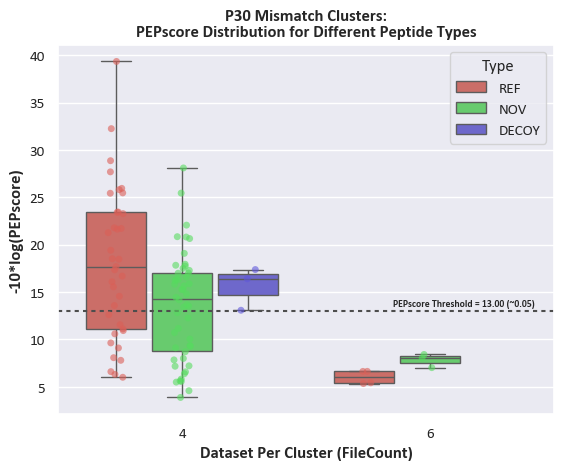

In [104]:
hue_order = ['REF','NOV','DECOY']

test1 = sns.boxplot(
    data = mis,
    x = 'FileCount',
    y = 'PEP(new)',
    hue = 'Type',
    palette = my_color3,
    hue_order = hue_order,
    gap = 0.1
)

sns.stripplot(
    data = mis,
    x = 'FileCount',
    y = 'PEP(new)',
    hue = 'Type',
    palette=my_color3,
    dodge = True,
    jitter = True,
    legend = False,
    alpha = 0.6,
    hue_order = hue_order
)

test1.axhline(13, color=".3", dashes=(2, 2))

test1.set_title('P30 Mismatch Clusters:\nPEPscore Distribution for Different Peptide Types', weight='bold')
test1.set_xlabel('Dataset Per Cluster (FileCount)', weight='bold')
test1.set_ylabel('-10*log(PEPscore)', weight ='bold')

test1.text(
    0.85,13.5,
    'PEPscore Threshold = 13.00 (~0.05)', 
    fontsize=7, weight='bold')

test1.figure.savefig('mis_boxplot(by_types).png',dpi =600)


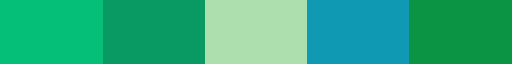

In [61]:
cmap14 = load_cmap('evergreen', keep=[False,False,False,False,True,True,True,True,True])
cmap14

Text(0.5, 0, 'Cluster ID')

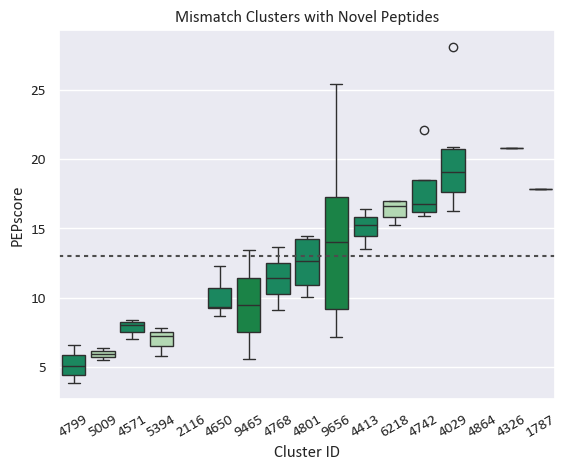

In [66]:
ax = sns.boxplot(
    data = mis.loc[mis['Type']=='NOV'],
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'Cluster_ID',
    legend =False,
    palette = cmap14,
    order = mis_new.index
)

plt.xticks(rotation =30)
plt.axhline(13, color=".3", dashes=(2, 2))
ax.set_title('Mismatch Clusters with Novel Peptides')
ax.set_ylabel('PEPscore')
ax.set_xlabel('Cluster ID')

Text(0.5, 0, 'Cluster ID')

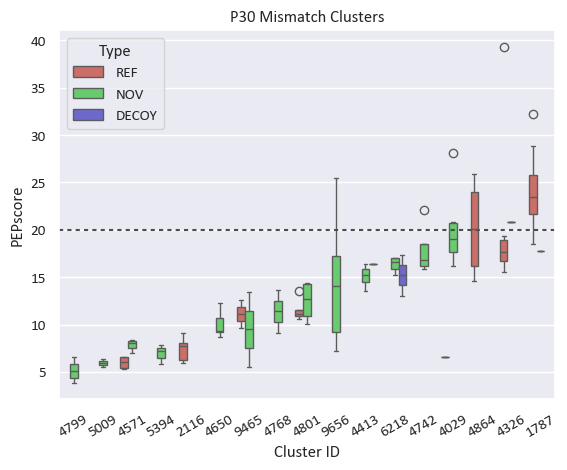

In [68]:
ax = sns.boxplot(
    data = mis,
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'Type',
    palette = my_color3,
    hue_order = hue_order,
    order = mis_new.index
)

plt.xticks(rotation =30)
plt.axhline(20, color=".3", dashes=(2, 2))
ax.set_title('P30 Mismatch Clusters')
ax.set_ylabel('PEPscore')
ax.set_xlabel('Cluster ID')

Text(0.5, 0, 'File Count in Each Cluster')

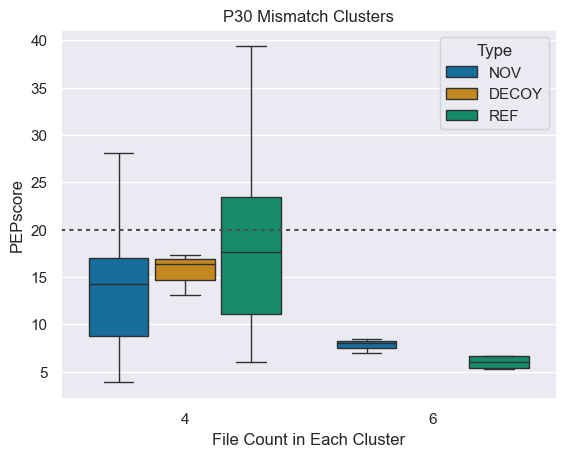

In [374]:
ax = sns.boxplot(
    data = mis,
    x = 'FileCount',
    y = 'PEP(new)',
    hue = 'Type',
    palette = 'colorblind',
    gap = 0.1
)

plt.axhline(20, color=".3", dashes=(2, 2))
ax.set_title('P30 Mismatch Clusters')
ax.set_ylabel('PEPscore')
ax.set_xlabel('File Count in Each Cluster')

Text(0.5, 0, 'Cluster ID')

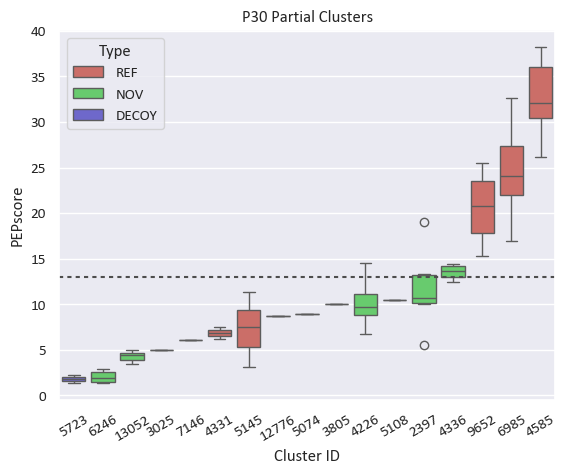

In [70]:
ax = sns.boxplot(
    data = par,
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'Type',
    palette = my_color3,
    hue_order = hue_order,
    order = par_new.index
    
)

plt.xticks(rotation =30)
plt.axhline(13, color=".3", dashes=(2, 2))
ax.set_title('P30 Partial Clusters')
ax.set_ylabel('PEPscore')
ax.set_xlabel('Cluster ID')

Text(0.5, 0, 'Cluster ID')

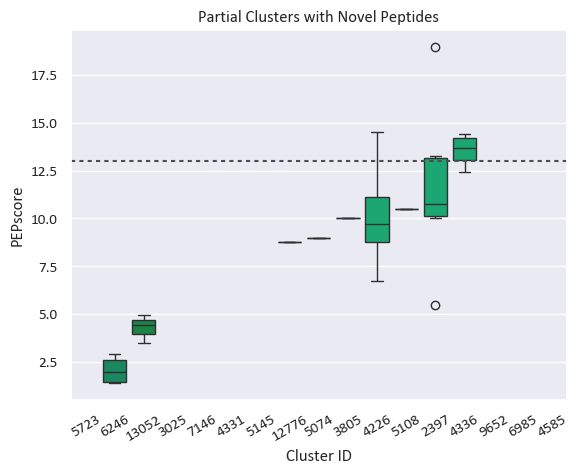

In [82]:
ax = sns.boxplot(
    data = par.loc[par['Type']=='NOV'],
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'Cluster_ID',
    legend = False,
    hue_order = hue_order,
    palette = cmap14,
    order = par_new.index
)

plt.xticks(rotation =30)
plt.axhline(13, color=".3", dashes=(2, 2))
ax.set_title('Partial Clusters with Novel Peptides')
ax.set_ylabel('PEPscore')
ax.set_xlabel('Cluster ID')

Text(0.5, 0, 'File Count in Each Cluster')

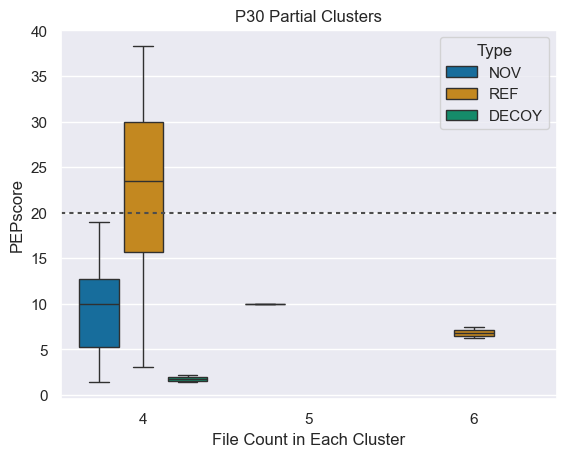

In [380]:
ax = sns.boxplot(
    data = par,
    x = 'FileCount',
    y = 'PEP(new)',
    hue = 'Type',
    palette = 'colorblind',
    gap = 0.1
)

plt.axhline(20, color=".3", dashes=(2, 2))
ax.set_title('P30 Partial Clusters')
ax.set_ylabel('PEPscore')
ax.set_xlabel('File Count in Each Cluster')

Text(0.5, 0, 'Cluster ID')

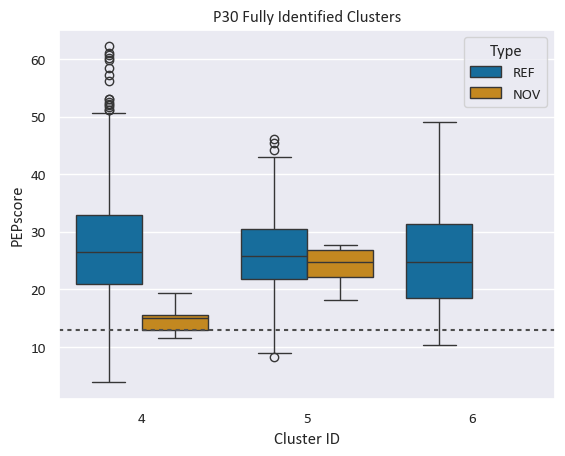

In [85]:
ax = sns.boxplot(
    data = id,
    x = 'FileCount',
    y = 'PEP(new)',
    hue = 'Type',
    palette = 'colorblind'
)

plt.axhline(13, color=".3", dashes=(2, 2))
ax.set_title('P30 Fully Identified Clusters')
ax.set_ylabel('PEPscore')
ax.set_xlabel('Cluster ID')

In [93]:
id

,Cluster_ID,Peptide,Type,PEP(new),PEPscore,FDR(new),FDR,Delta(new),Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
0,1558,SEAPPTNQA,REF,28.742065,0.001336,0.092980,0.000930,30.774904,0.307749,NaN,NaN,NaN,4,134653,AB15,21
1,1558,SEAPPTNQA,REF,19.490058,0.011246,0.027793,0.000278,15.978610,0.159786,NaN,NaN,NaN,4,35109,AB16,21
2,1558,SEAPPTNQA,REF,21.273194,0.007459,0.092980,0.000930,39.880200,0.398802,NaN,NaN,NaN,4,69378,AB15,21
3,1558,SEAPPTNQA,REF,24.561057,0.003499,0.026518,0.000265,19.531540,0.195315,SEAPPTNQA,92.7,95.4,4,90980,AB16,21
4,1558,SEAPPTNQA,REF,24.977955,0.003178,0.026518,0.000265,29.122163,0.291222,SEAPPTNQA,93.9,96.1,4,90594,AB16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,16355,TTDFLFNLY,REF,26.437963,0.002271,0.051733,0.000517,92.052307,0.920523,TTDFLFNLY,96.3,97.6,4,195213,ZK01,5
1501,16355,TTDFLFNLY,REF,33.629668,0.000434,0.055310,0.000553,96.133346,0.961333,NaN,NaN,NaN,4,198967,MM01,5
1502,16355,TTDFLFNLY,REF,42.469435,0.000057,0.013912,0.000139,96.846437,0.968464,NaN,NaN,NaN,4,443031,AB19,5
1503,16355,TTDFLFNLY,REF,40.620190,0.000087,0.013912,0.000139,91.563631,0.915636,NaN,NaN,NaN,4,393927,AB19,5


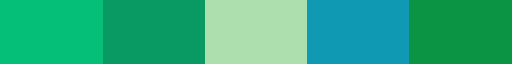

In [105]:
cmap14

Text(0.5, 0, 'Cluster ID')

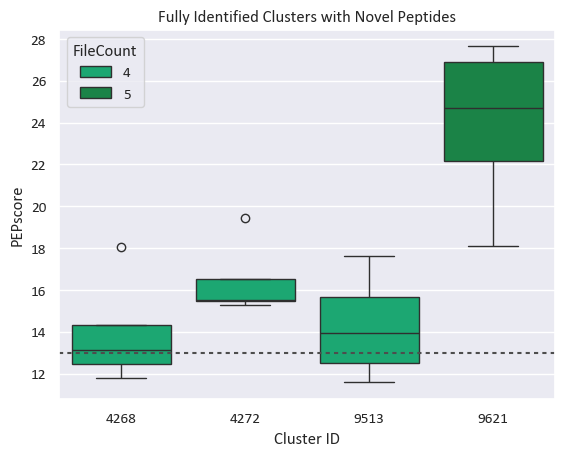

In [104]:
ax = sns.boxplot(
    data = id.loc[id['Type']=='NOV'],
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'FileCount',
    palette = cmap14,
)

plt.axhline(13, color=".3", dashes=(2, 2))
ax.set_title('Fully Identified Clusters with Novel Peptides')
ax.set_ylabel('PEPscore')
ax.set_xlabel('Cluster ID')

In [393]:
id.columns

Index(['Cluster_ID', 'Peptide', 'Type', 'PEP(new)', 'PEPscore', 'FDR(new)',
       'FDR', 'Delta(new)', 'Delta', 'Peaks_Peptide', 'SCORE (%)', 'ALC (%)',
       'FileCount', 'Spectrum_ID', 'File', 'Cluster_Size'],
      dtype='object')

Text(0.5, 0, 'Cluster ID')

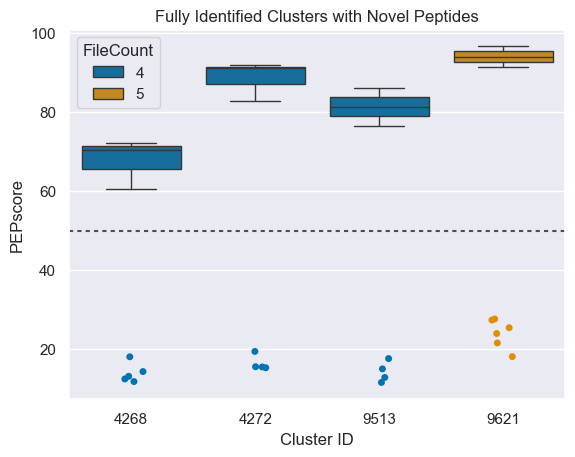

In [399]:
ax = sns.boxplot(
    data = id.loc[id['Type']=='NOV'],
    x = 'Cluster_ID',
    y = 'SCORE (%)',
    hue = 'FileCount',
    palette = 'colorblind'
)

sns.stripplot(
    data = id.loc[id['Type']=='NOV'],
    x = 'Cluster_ID',
    y = 'PEP(new)',
    hue = 'FileCount',
    palette = 'colorblind',
    legend = False
)

plt.axhline(50, color=".3", dashes=(2, 2))
ax.set_title('Fully Identified Clusters with Novel Peptides')
ax.set_ylabel('PEPscore')
ax.set_xlabel('Cluster ID')

In [7]:
id

,Cluster_ID,Peptide,Type,PEP(new),PEPscore,FDR(new),FDR,Delta(new),Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
0,1558,SEAPPTNQA,REF,28.742065,0.001336,30.316105,0.000930,5.118033,0.307749,NaN,NaN,NaN,4,134653,AB15,21
1,1558,SEAPPTNQA,REF,19.490058,0.011246,35.560614,0.000278,7.964610,0.159786,NaN,NaN,NaN,4,35109,AB16,21
2,1558,SEAPPTNQA,REF,21.273194,0.007459,30.316105,0.000930,3.992427,0.398802,NaN,NaN,NaN,4,69378,AB15,21
3,1558,SEAPPTNQA,REF,24.561057,0.003499,35.764560,0.000265,7.092635,0.195315,SEAPPTNQA,92.7,95.4,4,90980,AB16,21
4,1558,SEAPPTNQA,REF,24.977955,0.003178,35.764560,0.000265,5.357764,0.291222,SEAPPTNQA,93.9,96.1,4,90594,AB16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,16355,TTDFLFNLY,REF,26.437963,0.002271,32.862315,0.000517,0.359653,0.920523,TTDFLFNLY,96.3,97.6,4,195213,ZK01,5
1501,16355,TTDFLFNLY,REF,33.629668,0.000434,32.571987,0.000553,0.171259,0.961333,NaN,NaN,NaN,4,198967,MM01,5
1502,16355,TTDFLFNLY,REF,42.469435,0.000057,38.566073,0.000139,0.139164,0.968464,NaN,NaN,NaN,4,443031,AB19,5
1503,16355,TTDFLFNLY,REF,40.620190,0.000087,38.566073,0.000139,0.382770,0.915636,NaN,NaN,NaN,4,393927,AB19,5


In [9]:
id_6 = id.loc[id['FileCount']==6]

id_6

,Cluster_ID,Peptide,Type,PEP(new),PEPscore,FDR(new),FDR,Delta(new),Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
21,1719,EEEEPVKEA,REF,19.376700,0.011543,32.862315,0.000517,1.197830,0.758957,NaN,NaN,NaN,6,10868,ZK01,8
22,1719,EEEEPVKEA,REF,27.618560,0.001730,32.038484,0.000625,1.459737,0.714540,NaN,NaN,NaN,6,9609,MM01,8
23,1719,EEEEPVKEA,REF,22.465380,0.005668,35.299440,0.000295,6.637313,0.216905,EEEEPVKEA,98.7,99.5,6,100873,AB18,8
24,1719,EEEEPVKEA,REF,35.235756,0.000300,38.566073,0.000139,7.174380,0.191673,NaN,NaN,NaN,6,175596,AB19,8
25,1719,EEEEPVKEA,REF,36.026876,0.000250,38.566073,0.000139,7.414457,0.181365,NaN,NaN,NaN,6,143789,AB19,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,5272,VSDPVGVLY,REF,31.687575,0.000678,35.299440,0.000295,3.496293,0.447065,NaN,NaN,NaN,6,119964,AB18,11
971,5272,VSDPVGVLY,REF,29.966601,0.001008,35.299440,0.000295,2.264459,0.593682,NaN,NaN,NaN,6,196030,AB18,11
972,5272,VSDPVGVLY,REF,30.412336,0.000909,35.299440,0.000295,3.577981,0.438735,NaN,NaN,NaN,6,234273,AB18,11
973,5272,VSDPVGVLY,REF,40.222179,0.000095,32.571987,0.000553,4.484915,0.356048,NaN,NaN,NaN,6,103417,MM01,11
